In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.array([[0,1,0,1], [1,0,1,1], [0,0,0,1], [1,0,1,0]])
y = np.array([0,1,0,1])

In [7]:
counts = {}
for label in np.unique(y):
    print (X[y == label])
    #counts[label] = x[y == label].sum(axis = 0)

[[0 1 0 1]
 [0 0 0 1]]
[[1 0 1 1]
 [1 0 1 0]]


## 결정 트리 정리

- 질문과 답을 통해서 구분 해 간다
- 결정 트리를 학습 한다는 것은 예/아니오의 질문목록을 학습 하는것
- 알고리즘은 타깃값에 대해 가장 많은 정보를 가진 것을 고르려고 한다
- 해당 영역(노드)의 타깃값중 다수인 것을 예측 결과로 한다.
- 과적합을 막는 방법은 가지치기 등이 있다.

1. 임포트 하기
    - from sklearn.tree import DescisionTreeClassifier
    - from sklearn.model_selection import train_test_split
    
2. 모델 적용하기

    2.1 테스트 트레인 셋 나누기
    - X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

    2.2 모델 만들기
    - tree = DescisionTreeclassifier().fit(X_train, y_train)
    - () 에 변수로 max_depth 를 줄 수 있다(과적합 방지)
 
3. 모델 확인하기
    
    3.1 계수 확인하기(feature_importances 확인)
    - tree.feature_importances_
        - 특성의 중요도, 0과 1사이의 값이 나오며 총 합은 1이다. 1은 완벽하게 타깃 클래스를 예측 했다는 뜻
        
    3.2 score 확인하기
    - tree.socre(X_train, y_train)

4. 매개변수(하이퍼 파라미터)
    
    - max_depth, max_leaf_nodes, min_samples_leaf 등 3가지 있음.
    - 과대적합을 막기 위함

### 결정 트리

In [15]:
import mglearn

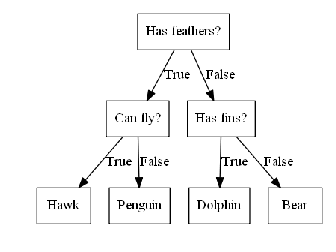

In [18]:
mglearn.plots.plot_animal_tree()

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터 셋 불러오기

In [26]:
from sklearn.model_selection import train_test_split

In [30]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state =42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print ('test score {:.3f}'.format(tree.score(X_train, y_train)))
print ('test score {:.3f}'.format(tree.score(X_test, y_test)))

test score 1.000
test score 0.937


In [31]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print ('train score {:.3f}'.format(tree.score(X_train, y_train)))
print ('test score {:.3f}'.format(tree.score(X_test, y_test)))

train score 0.988
test score 0.951


In [42]:
from sklearn.tree import export_graphviz # 시각화 모듈 불러오기
export_graphviz(tree, out_file = 'tree.dot', class_names = ['neg', 'pos', 'exe'],
                feature_names = cancer.feature_names, impurity = False, filled = True)

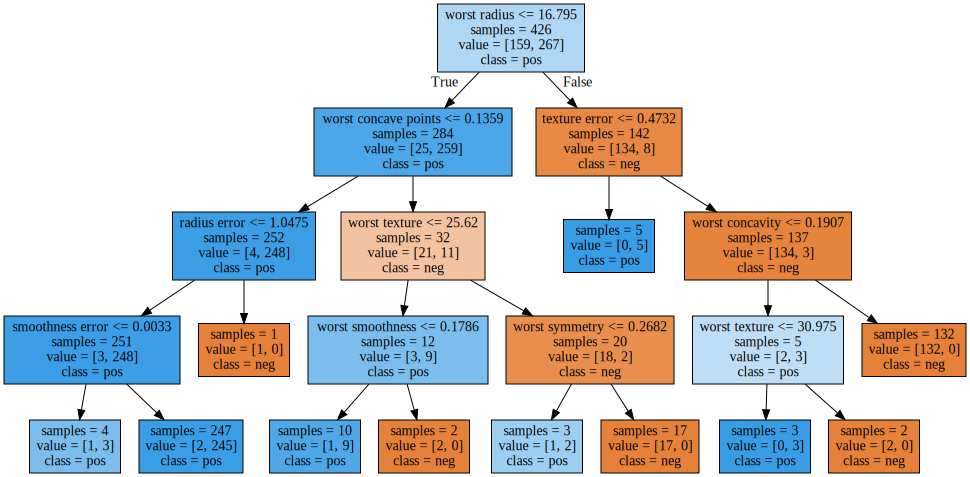

In [43]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

decision_tree : decision tree classifier
    The decision tree to be exported to GraphViz.

out_file : file object or string, optional (default='tree.dot')
    Handle or name of the output file. If ``None``, the result is
    returned as a string. This will the default from version 0.20.

max_depth : int, optional (default=None)
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : list of strings, optional (default=None)
    Names of each of the features.

class_names : list of strings, bool or None, optional (default=None)
    Names of each of the target classes in ascending numerical order.
    Only relevant for classification and not supported for multi-output.
    If ``True``, shows a symbolic representation of the class name.

label : {'all', 'root', 'none'}, optional (default='all')
    Whether to show informative labels for impurity, etc.
    Options include 'all' to show at every node, 'root' to show only at
    the top root node, or 'none' to not show at any node.

filled : bool, optional (default=False)
    When set to ``True``, paint nodes to indicate majority class for
    classification, extremity of values for regression, or purity of node
    for multi-output.

leaves_parallel : bool, optional (default=False)
    When set to ``True``, draw all leaf nodes at the bottom of the tree.

impurity : bool, optional (default=True)
    When set to ``True``, show the impurity at each node.
    # 지니값(gini)을 보여줄지 말지 결정함

node_ids : bool, optional (default=False)
    When set to ``True``, show the ID number on each node.

proportion : bool, optional (default=False)
    When set to ``True``, change the display of 'values' and/or 'samples'
    to be proportions and percentages respectively.

rotate : bool, optional (default=False)
    When set to ``True``, orient tree left to right rather than top-down.

rounded : bool, optional (default=False)
    When set to ``True``, draw node boxes with rounded corners and use
    Helvetica fonts instead of Times-Roman.

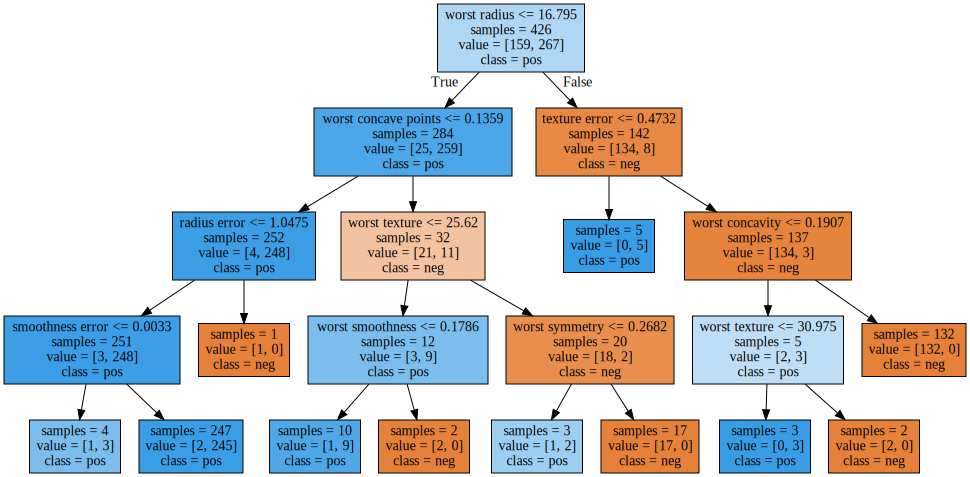

In [35]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [45]:
print ('feature_importance :\n{}'.format(tree.feature_importances_))

feature_importance :
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


<Container object of 3 artists>

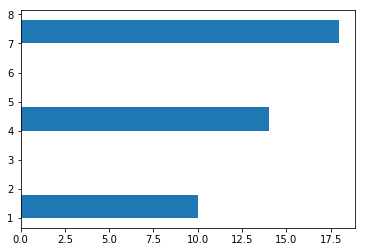

In [58]:
plt.barh(np.arange(1,10,3), np.arange(10,20,4), align = 'edge')

<Container object of 5 artists>

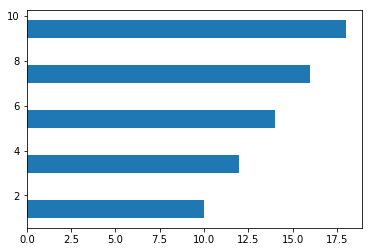

In [54]:
plt.barh(np.arange(1,10,2), np.arange(10,20,2), align = 'edge')

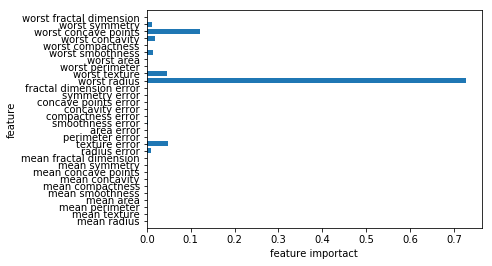

In [50]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importact')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


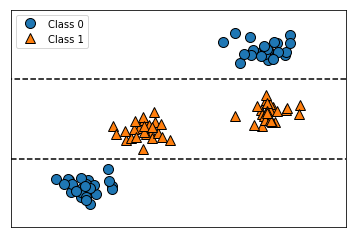

In [61]:
tree = mglearn.plots.plot_tree_not_monotone()

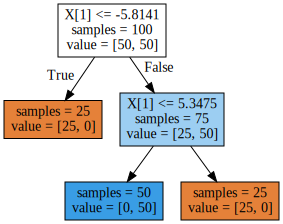

In [62]:
display(tree)

In [64]:
import os

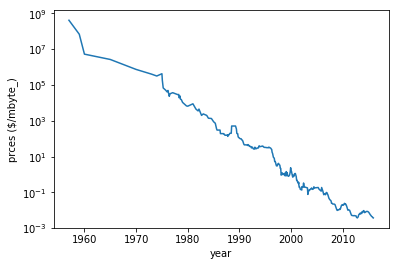

In [69]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('prces ($/mbyte_)')

In [73]:
from sklearn.linear_model import LinearRegression

In [97]:
y_train.shape
X_train.shape

(202, 1)

In [92]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date>= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [90]:
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [76]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

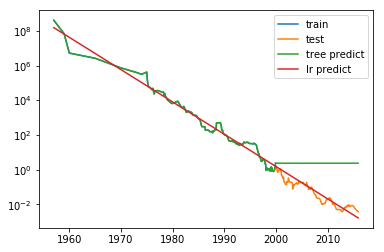

In [80]:
plt.semilogy(data_train.date, data_train.price, label = 'train')
plt.semilogy(data_test.date, data_test.price, label = 'test')
plt.semilogy(ram_prices.date, price_tree, label = 'tree predict')
plt.semilogy(ram_prices.date, price_lr, label = 'lr predict')
plt.legend()

In [86]:
ram_prices.date.shape

(333,)

In [85]:
ram_prices.date[:, np.newaxis].shape

(333, 1)

In [72]:
print (np.newaxis)

None


In [10]:
X[2]

array([0, 0, 0, 1])

In [11]:
X[3]

array([1, 0, 1, 0])

In [12]:
for i in np.unique(y):
    print (y == i)

[ True False  True False]
[False  True False  True]


In [13]:
X.sum(axis = 0)

array([2, 1, 2, 3])

In [14]:
X.sum(axis = 1)

array([2, 3, 1, 2])